In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import cv2


In [31]:
%cd 
%cd Desktop/gan_video/

/Users/jesusnavarro
/Users/jesusnavarro/Desktop/gan_video


In [32]:
paths = []
sub_dir = '/images/bball_22_dur_81mp4/'
root = %pwd
images = os.listdir(root + sub_dir)

pca = PCA(n_components=2)

for image_ in images:
    paths.append(root + sub_dir + image_)
paths = sorted(paths)
for path in pp:
    print(path)



/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame00000.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame00001.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame00002.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame00003.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame00004.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame00005.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame00006.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame00007.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame00008.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame00009.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame00010.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame00011.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_2

/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame01851.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame01852.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame01853.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame01854.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame01855.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame01856.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame01857.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame01858.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame01859.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame01860.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame01861.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_22_dur_81mp4/frame01862.jpg
/Users/jesusnavarro/Desktop/gan_video/images/bball_2

In [91]:
from keras.preprocessing import image
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
kpca = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=10)
#data = []
import numpy as np
from scipy import ndimage 
rows, cols = 128, 128
win_rows, win_cols = 2, 2

#win_mean = ndimage.uniform_filter(img, (win_rows, win_cols))
#win_sqr_mean = ndimage.uniform_filter(img**2, (win_rows, win_cols))
#win_var = win_sqr_mean - win_mean**2
data_pix = {}
data_pix[str(0)] = []
data_pix[str(1)] = []
data_pix[str(2)] = []

for i, path in enumerate(pp, 0):
    if i % 100 == 0:
        print(i / n)
    img = image.load_img(path, target_size=(256, 256))
    img = np.array(img).transpose(2,1,0)
    for j in range(3):
        img_color = img[j,:,:]
        win_mean = np.mean(img_color)
        win_std = np.std(img_color)
        data_pix[str(j)].append([win_mean, win_std])
    #data.append(np.array(img))
    


0.0
0.0059694364851957974
0.011938872970391595
0.01790830945558739
0.02387774594078319
0.029847182425978988
0.03581661891117478
0.041786055396370585
0.04775549188156638
0.053724928366762174
0.059694364851957976
0.06566380133715377
0.07163323782234957
0.07760267430754537
0.08357211079274117
0.08954154727793696
0.09551098376313276
0.10148042024832855
0.10744985673352435
0.11341929321872016
0.11938872970391595
0.12535816618911175
0.13132760267430754
0.13729703915950334
0.14326647564469913


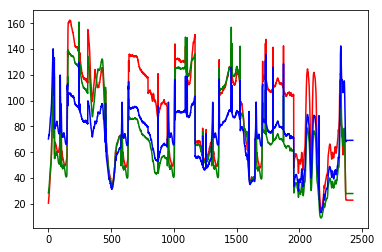

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1300
1301
1302


In [99]:
x = np.arange(0, len(pp))
plt.plot(x, [x[0] for x in data_pix[str(0)]], 'r')
plt.plot(x, [x[0] for x in data_pix[str(1)]], 'g')
plt.plot(x, [x[0] for x in data_pix[str(2)]], 'b')
plt.show()

i = 0
for r, g, b in zip(data_pix[str(0)], data_pix[str(1)], data_pix[str(2)]):
    if b[0] > g[0] and b[0] > r[0]:
        print(i)
    i += 1

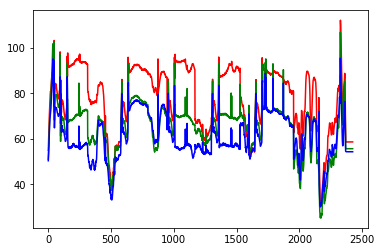

In [98]:
plt.plot(x, [x[1] for x in data_pix[str(0)]], 'r')
plt.plot(x, [x[1] for x in data_pix[str(1)]], 'g')
plt.plot(x, [x[1] for x in data_pix[str(2)]], 'b')
plt.show()



In [73]:
sec_20 = 30 * 20
kpca = KernelPCA(kernel='cosine', fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(data[:sec_20])
print(X_kpca.shape)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_kpca[:,0:2])
print(kmeans.labels_)

(600, 600)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


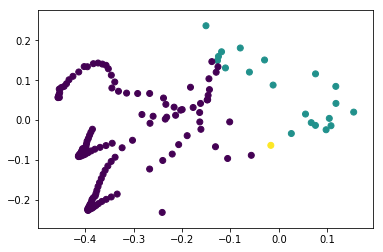

In [77]:
# Convert first 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter([x[0] for x in X_kpca[:4*36]], 
           [x[1] for x in X_kpca[:4*36]], c=kmeans.labels_[:4*36])

print(kmeans.labels_[:4*36])

In [43]:
idd = []
for i, comps in enumerate(X_kpca, 0):
    if comps[0] < -0.2 or np.abs(comps[1]) > 0.1:
        idd.append(i)
        
print(idd)

[1, 176, 177, 178, 179]


In [50]:
kmeans.cluster_centers_

array([[-2.66656622e-01, -2.30504648e-02, -3.68199867e-02, ...,
        -5.21354386e-07, -3.17739787e-07,  8.67865698e-09],
       [ 1.40452725e-01,  1.21410845e-02,  1.93937335e-02, ...,
         2.74606497e-07,  1.67359126e-07,  8.67865698e-09]])

In [62]:
print(X_kpca[:,0:2].shape)

(600, 2)
